 # 7. Foundations of Calculus

In [264]:
from spb import (
    plot,
    plot3d,
    plot_list,
    plot_piecewise
)
from sympy import (
    Abs,
    And,
    Eq,
    Function,
    Implies,
    Integral,
    Interval,
    Lambda,
    minimum,
    maximum,
    Piecewise,
    symbols,
    Symbol,
    Union
)

In [4]:
unit_i = Interval(0, 1)
unit_i

Interval(0, 1)

In [94]:
x = Symbol('x', real=True)
f = Function('f', domain=unit_i)(x)
f

f(x)

In [199]:
f_sqr = Piecewise(
    (x**2, And(x >= unit_i.start, x <= unit_i.end)),
    (nan, True)
)

f_sqr

Piecewise((x**2, (x >= 0) & (x <= 1)), (nan, True))

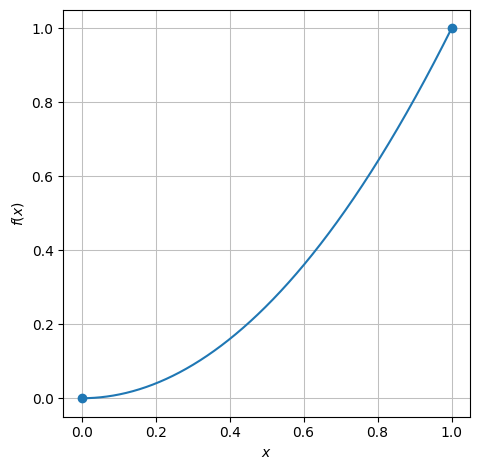

In [200]:
plot_piecewise(
    f_sqr,
    aspect='equal'
)

In [191]:
m, M = symbols('m, M')

f_bounded = And(m <= f, f <= M)
f_bounded

(m <= f(x)) & (f(x) <= M)

In [203]:
f_sqr_min = minimum(f_sqr, x, unit_i)
f_sqr_min

0

In [204]:
f_sqr_max = maximum(f_sqr, x, unit_i)
f_sqr_max

1

In [209]:
And(m <= f_sqr_min, f_sqr_max <= M)

(1 <= M) & (m <= 0)

In [217]:
And(f_sqr.subs(x, 0) <= 0, f_sqr.subs(x, 1) >= 0)

True

In [225]:
imp1 = Implies(
    And(f_sqr.subs(x, 0) <= 0, f_sqr.subs(x, 1) >= 0),
    0 in function_range(f_sqr, x, unit_i)
)

imp1

True

In [228]:
x1, x2, delta, epsilon = symbols('x1, x2, δ, ε')

Implies(
    Abs(x1 - x2) < delta,
    Abs(f_sqr.subs(x, x1) - f_sqr.subs(x, x2)) < epsilon
)

Implies(Abs(x1 - x2) < δ, Abs(Piecewise((x1**2, (x1 >= 0) & (x1 <= 1)), (nan, True)) - Piecewise((x2**2, (x2 >= 0) & (x2 <= 1)), (nan, True))) < ε)

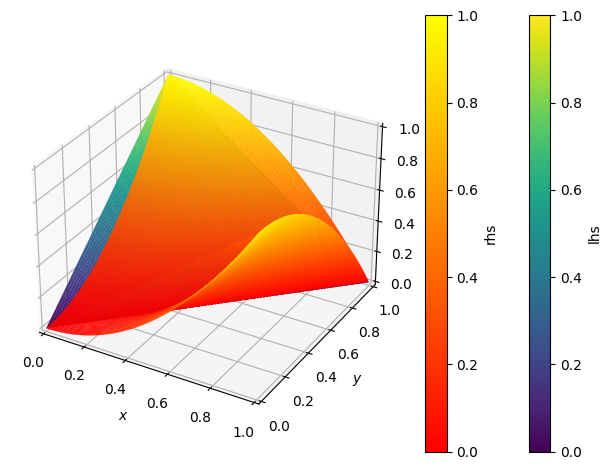

In [249]:
y = Symbol('y')

plot3d(
    (Abs(x - y), 'lhs'),
    (Abs(f_sqr - f_sqr.subs(x, y)), 'rhs'),
    (x, 0, 1),
    (y, 0, 1),
    use_cm=True
)

In [259]:
f_para = x * (1 - x)
f_para

x*(1 - x)

In [260]:
f_para.diff(x)

1 - 2*x

In [269]:
f_para.diff(x).subs(x, .5)

0

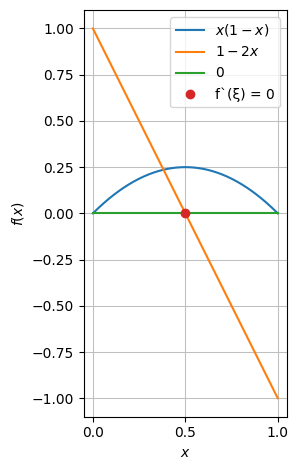

In [275]:
p1 = plot(
    f_para,
    f_para.diff(x),
    f_para.subs(x, 1) - f_para.subs(x, 0),
    (x, 0, 1),
    aspect='equal',
    show=False
)

p2 = plot_list(
    ([.5], [0], 'f`(ξ) = 0'),
    aspect='equal',
    is_point=True,
    show=False
)

(p1 + p2).show()

In [308]:
a, b, xi = symbols('a, b, ξ')
f = Function('f')
f_p = Function('f`')

eq1 = Eq(f(b) - f(a), f_p(xi) * (b - a))
eq1

Eq(-f(a) + f(b), (-a + b)*f`(ξ))

In [313]:
eq1.subs(
    {
        f_p(xi): f_para.diff(x),
        f(a): f_para.subs(x, 0),
        f(b): f_para.subs(x, 1),
        a: 0,
        b: 1,
        x: .5
    }
)

True

In [315]:
imp2 = Implies(
    Abs(x1 - x2) < delta,
    Abs(f_sqr.subs(x, x1) - f_sqr.subs(x, x2)) < epsilon / (b - a)
)

imp2

Implies(Abs(x1 - x2) < δ, Abs(Piecewise((x1**2, (x1 >= 0) & (x1 <= 1)), (nan, True)) - Piecewise((x2**2, (x2 >= 0) & (x2 <= 1)), (nan, True))) < ε/(-a + b))

In [326]:
imp2.subs(
    {
        x1: .4,
        x2: .5,
        delta: .5,
        a: 0,
        b: 1,
        epsilon: .1
    }
)

True

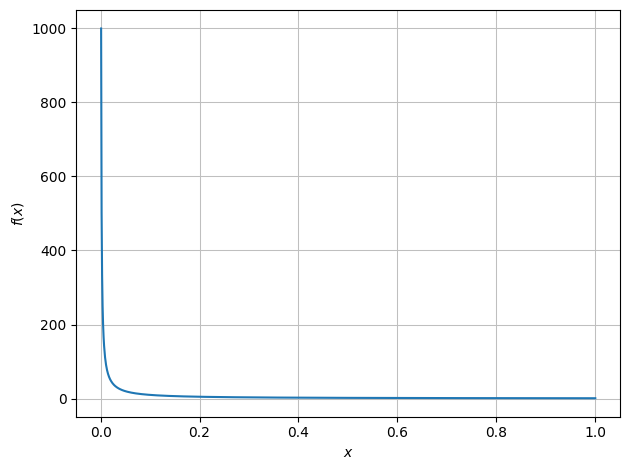

In [367]:
plot(1/x, (x, 0, 1))

In [422]:
def open_intervals(i):
    space = (1/i)
    intervals = [
        Interval((space*x)-(i/5000), (space*(x+1))+(i/5000), True, True)
        for x
        in range(0, i)
    ]
    return intervals

open_i = open_intervals(5)
open_i

[Interval.open(-0.00100000000000000, 0.201000000000000),
 Interval.open(0.199000000000000, 0.401000000000000),
 Interval.open(0.399000000000000, 0.601000000000000),
 Interval.open(0.599000000000000, 0.801000000000000),
 Interval.open(0.799000000000000, 1.00100000000000)]

In [423]:
Ui = Union(*open_i)
Ui

Interval.open(-0.00100000000000000, 1.00100000000000)

In [424]:
S = Interval(0, 1)
S

Interval(0, 1)

In [425]:
Ui.issuperset(S)

True

In [428]:
S.boundary

{0, 1}

In [427]:
xi = S.boundary.sup
xi

1

In [432]:
xi = .5
if xi < S.boundary.sup:
    Uj = [x for x in open_i if xi in x][0]

Uj

Interval.open(0.399000000000000, 0.601000000000000)

In [434]:
Uj.sup > xi

True

In [435]:
Uj.intersect(S)

Interval.open(0.399000000000000, 0.601000000000000)

In [436]:
x0 = Symbol('x0')

def create_open_U(x, width):
    return Interval(x-(width/2), x+(width/2), True, True)

Ux0 = create_open_U(x0, .1)
Ux0

Interval.open(x0 - 0.05, x0 + 0.05)

In [437]:
epsilon = Symbol('ε', positive=True)

Implies(
    And(Ux0.contains(x1), Ux0.contains(x2)),
    Abs(f(x1) - f(x2)) < epsilon
)

Implies((x1 < x0 + 0.05) & (x2 < x0 + 0.05) & (x0 - 0.05 < x1) & (x0 - 0.05 < x2), Abs(f(x1) - f(x2)) < ε)

In [441]:
def create_open_V(x, U):
    width = U.measure / 2
    return create_open_U(x, width)

Vx0 = create_open_V(x0, Ux0)
Vx0

Interval.open(x0 - 0.025, x0 + 0.025)

In [442]:
Eq(
    Vx0.measure,
    Ux0.measure / 2
)

True

In [452]:
X = Interval(0, 1)
X

Interval(0, 1)

In [453]:
C = Interval(.25, .75)
C

Interval(0.250000000000000, 0.750000000000000)

In [454]:
C.issubset(X)

True

In [448]:
C.is_open

False

In [449]:
C_complement = X - C
C_complement

Union(Interval.Ropen(0, 0.250000000000000), Interval.Lopen(0.750000000000000, 1))

In [481]:
def is_open_in(A, B):
    inner_bounds = [x for x in A.boundary if x not in B.boundary]
    return not all([A.contains(x) for x in inner_bounds])

is_open_in(C_complement, X)

True

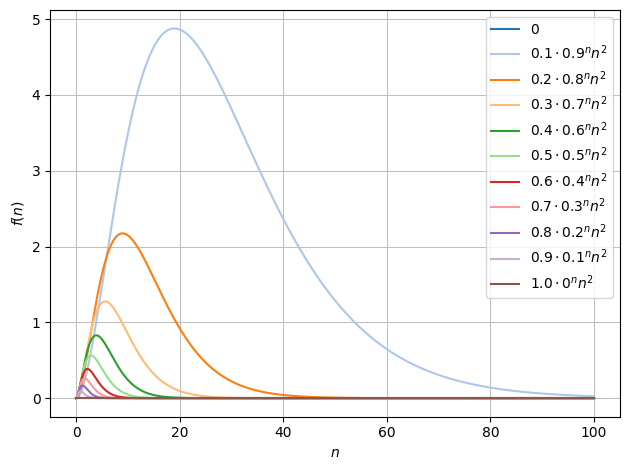

In [533]:
n = Symbol('n')

f_n_x = n**2*x*(1-x)**n

plot(
    *[f_n_x.subs(x, i/10) for i in range(0, 11)],
    (n, 0, 100)
)

In [537]:
f_n_x_def_int = Integral(f_n_x, (x, 0, 1))
f_n_x_def_int

Integral(n**2*x*(1 - x)**n, (x, 0, 1))

In [538]:
f_n_x_def_int.doit()

Piecewise((-n**2*(1 + I*pi) + oo*sign(n**2), Eq(n, -2)), (I*pi*n**2 + oo*sign(n**2), Eq(n, -1)), (n**2/(n**2 + 3*n + 2), True))

In [539]:
f_n_x_def_int.doit().args[2][0]

n**2/(n**2 + 3*n + 2)

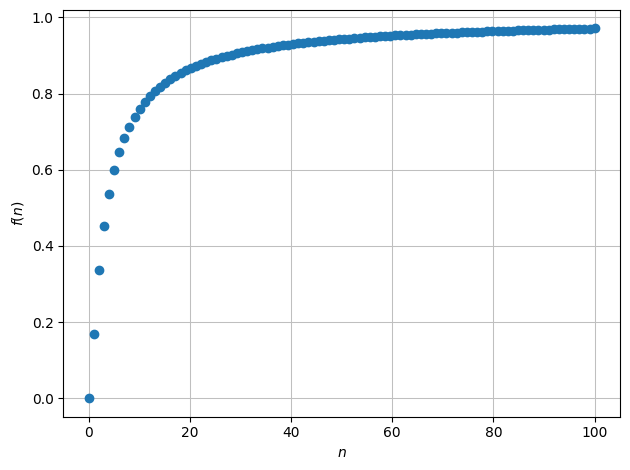

In [540]:
plot_piecewise(
    f_n_x_def_int.doit(),
    (n, 0, 100),
    n=100,
    is_point=True
)